# Machine Learning workshop 

# Aim: to  use the SDSS DR16 quasar catalog to predict the redshift of unknown quasars.

We will use u,g,r,i,z magnitudes and the corresponding extinction values to build a regresson model that can predict the redshift of quasars.

In [1]:
import pandas as pd
from google.colab import drive 
file_path = '/content/drive/My Drive/data.csv' 

# Read the data into a Pandas DataFrame
#df = pd.read_csv(file_path)

# Print the first 5 rows of the data
#print(df.head())


############## Another way #############
#from google.colab import files

#uploaded = files.upload()
#######################################

ModuleNotFoundError: No module named 'google.colab'

# **Reading the data using pandas**


---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('https://ff6b8c1c-c22c-4c69-b34c-fa3dbd3e97b5.filesusr.com/ugd/9f63fe_51f323a9cdc4405a91fa58fbb4011dff.csv?dn=DR16Q_NonBALs_ASIML.csv')

# **Explore the dataset**

This code calls the head() method on the data pandas dataframe, which returns the first 5 rows (by default) of the dataframe. The head() method provides a quick way to preview the data in the dataframe, which can be helpful in checking the data format and structure, and making sure that the data has been loaded correctly. The number of rows displayed by the head() method can be adjusted by passing a desired number as an argument, such as data.head(10) to display the first 10 rows of the dataframe.

Note that the PSFMAG and EXTINCTION parameters are given as tuples.  We will have to split thpse tuples in to individual parameters.

In [ ]:
df.head()

# **Redefining a new pandas DataFrame**

In [ ]:
# Initialize a pandas DataFrame with the default values
data = pd.DataFrame()

# Add a column to the DataFrame with the values from the 'SDSS_NAME' column in the 'df' DataFrame
data['SDSS_NAME'] = df['SDSS_NAME']

# Add a column to the DataFrame with the values from the 'RA' column in the 'df' DataFrame
data['RA'] = df['RA']

# Add a column to the DataFrame with the values from the 'DEC' column in the 'df' DataFrame
data['DEC'] = df['DEC']

# Add a column to the DataFrame with the values from the 'PLATE' column in the 'df' DataFrame
data['PLATE'] = df['PLATE']

# Add a column to the DataFrame with the values from the 'MJD' column in the 'df' DataFrame
data['MJD']  = df['MJD']

# Add a column to the DataFrame with the values from the 'FIBERID' column in the 'df' DataFrame
data['FIBERID'] = df['FIBERID']

# Add a column to the DataFrame with the values from the 'Z_VI' column in the 'df' DataFrame
data['Z_VI'] = df['Z_VI']

# Add a column to the DataFrame with the values from the first item of the 'PSFMAG' column in the 'df' DataFrame, converted to float type
data['U_MAG'] = [ float(df['PSFMAG'][i].split(',')[0].split('(')[1]) for i in range(len(df))]

# Add a column to the DataFrame with the values from the second item of the 'PSFMAG' column in the 'df' DataFrame, converted to float type
data['G_MAG'] = [ float(df['PSFMAG'][i].split(',')[1]) for i in range(len(df))]

# Add a column to the DataFrame with the values from the third item of the 'PSFMAG' column in the 'df' DataFrame, converted to float type
data['R_MAG'] = [ float(df['PSFMAG'][i].split(',')[2]) for i in range(len(df))]

# Add a column to the DataFrame with the values from the fourth item of the 'PSFMAG' column in the 'df' DataFrame, converted to float type
data['I_MAG'] = [ float(df['PSFMAG'][i].split(',')[3]) for i in range(len(df))]

# Add a column to the DataFrame with the values from the fifth item of the 'PSFMAG' column in the 'df' DataFrame, converted to float type
data['Z_MAG'] = [ float(df['PSFMAG'][i].split(',')[4].split(')')[0]) for i in range(len(df))]

# Similarly do for Extinction
data['U_EXT'] = [ float(df['EXTINCTION'][i].split(',')[0].split('(')[1]) for i in range(len(df))]
data['G_EXT'] = [ float(df['EXTINCTION'][i].split(',')[1]) for i in range(len(df))]
data['R_EXT'] = [ float(df['EXTINCTION'][i].split(',')[2]) for i in range(len(df))]
data['I_EXT'] = [ float(df['EXTINCTION'][i].split(',')[3]) for i in range(len(df))]
data['Z_EXT'] = [ float(df['EXTINCTION'][i].split(',')[4].split(')')[0]) for i in range(len(df))]


# **Printing the dataframe statistics**
The describe() method on the data pandas dataframe returns various statistical information about the numerical columns in the dataframe. The output provides count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value for each numerical column in the dataframe. The describe() method gives a quick and easy way to get an overview of the numerical data in the dataframe, which can be helpful in understanding the distribution and range of values for each column.

Note that for some of the parameters there are -9999 values for eg, Z_VI, all magnitudes. These -9999 values are basically unreliable entries and need to be cleaned before any ML exercise 

In [ ]:
data.describe()

# **Histograms of parameters in the dataframe**
This code calls the hist() method on the data pandas dataframe, which generates a histogram for each numerical column in the dataframe. The histograms provide a graphical representation of the distribution of values for each column, and help to quickly identify the shape of the distribution and any potential outliers. By default, the hist() method generates histograms for all numerical columns in the dataframe, but the columns to be plotted can be specified by passing a list of column names as an argument, such as data.hist(['col1', 'col2']). The hist() method is a useful tool for exploratory data analysis and for gaining a better understanding of the structure and distribution of the data.

This is is nice way to explore the input parameters. It is clear that the -9999 values are creating a skewed distributions. We will have to clean the data to remove these absurd values.

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()

# **Cleaning the data**
This step removes the negative values from the input parameters.

This code removes all rows in the data pandas dataframe where the value for each of the specified columns (Z_VI, U_MAG, G_MAG, R_MAG, I_MAG, Z_MAG, U_EXT, G_EXT, R_EXT, I_EXT, Z_EXT) is less than 0. This is done using the drop method with the inplace argument set to True, which updates the data dataframe in place and does not return a new dataframe. The method data.index[data['column'] < 0] returns the index of all rows where the value of the specified column is less than 0. The drop method is called once for each of the specified columns, removing the corresponding rows where the condition is met. This operation is useful for removing any invalid or missing data from the dataframe, which could cause errors or affect the accuracy of subsequent analyses.



In [ ]:
data.drop(data.index[data['Z_VI'] <0], inplace = True)
data.drop(data.index[data['U_MAG'] <0], inplace = True)
data.drop(data.index[data['G_MAG'] <0], inplace = True)
data.drop(data.index[data['R_MAG'] <0], inplace = True)
data.drop(data.index[data['I_MAG'] <0], inplace = True)
data.drop(data.index[data['Z_MAG'] <0], inplace = True)
data.drop(data.index[data['U_EXT'] <0], inplace = True)
data.drop(data.index[data['G_EXT'] <0], inplace = True)
data.drop(data.index[data['R_EXT'] <0], inplace = True)
data.drop(data.index[data['I_EXT'] <0], inplace = True)
data.drop(data.index[data['Z_EXT'] <0], inplace = True)


# **Print the statistics to ensure that the negative values are gone**
Note that the count has significantly reduced

In [ ]:
data.describe()

# **Explore the correlations between output label and input parameters**

In [ ]:
# Calculating the correlation matrix
# The correlation matrix measures the linear relationship between all the features in the data
# It gives us a score between -1 and 1, with 1 meaning a perfect positive linear relationship, 0 meaning no linear relationship, and -1 meaning a perfect negative linear relationship

corr_matrix = data[['Z_VI','U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT']].corr()

# Sorting the values of correlation of Z_VI with other features
# Sorting in descending order to see which features have the strongest positive linear relationship with Z_VI
# Positive linear relationship means that if Z_VI increases, the other feature also increases

corr_matrix['Z_VI'].sort_values(ascending=False)


# **Create attribute combinations**
Here we will create new input parameters which are actually the colors, i.e. magnitude differences.

The code creates four new columns in the data DataFrame: 'U-G_COLOR', 'G-R_COLOR', 'R-I_COLOR', and 'I-Z_COLOR'.
These new columns represent the color indices calculated as the difference between the magnitudes in different filters.
For example, 'U-G_COLOR' is calculated as the difference between the 'U_MAG' and 'G_MAG' columns.
The color indices can provide additional information about the properties of the objects in the data.

In [ ]:
data['U-G_COLOR'] = data['U_MAG'] - data['G_MAG']
data['G-R_COLOR'] = data['G_MAG'] - data['R_MAG']
data['R-I_COLOR'] = data['R_MAG'] - data['I_MAG']
data['I-Z_COLOR'] = data['I_MAG'] - data['Z_MAG']


# **Histograms of cleaned dataset**

In [ ]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#from google_drive_downloader import GoogleDriveDownloader as gd
#gd.download_file_from_google_drive(file_id='1UT2BCf-IDUEpvTmcU4bq6nDcY3Ayw5vJ', dest_path='./data/stamps_noise.npy', unzip=False)
#gd.download_file_from_google_drive(file_id='1cZaMCA0z_nPX6GB_meLGouwOidEROcwc', dest_path='./data/stamps_sources.npy', unzip=False)

# **Correlations of the new data with colors**

In [ ]:
corr_matrix = data[['Z_VI','U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']].corr()
corr_matrix['Z_VI'].sort_values(ascending=False)

# **Scatter matrix to explore the correlations between parameters**

The following code imports the scatter_matrix function from pandas.plotting module.
The variable 'attributes' is defined as a list of columns from the data frame that are to be plotted in the scatter matrix.
The scatter_matrix function takes in the data frame with only the specified columns and creates a scatter matrix plot of all possible combinations of the specified columns.






In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Z_VI','U-G_COLOR','G-R_COLOR','U_MAG','R_MAG','I_EXT']
scatter_matrix(data[attributes],figsize=(12,8))
plt.show()

# **Feature Scaling**
It is better to have the input parameters distributed between 0 and 1. Otherwise the difference in the values, for eg, in our case magnitudes are distributed around 20 and extintion values are distributed around 1. To enable the algorithm to give equal weightage to all parameters, it is  good to scale the features to a common values. 

It is recommended to distribute values between 0 and 1. Two approaches are common, MinMaxScaler and StandardScaler

MinMaxScaler : tries to make the minimum value 0 and maximum value 1 and distribute all other values accordingly. Values are shifted and rescaled so that they end up ranging from 0 and 1

StandardScaler : substracts the mean from each values and then divided by the standard deviation so that the resulting distribution has unit variance and zero mean.

In [ ]:
#The following code imports the StandardScaler class from the sklearn.preprocessing module.
#The StandardScaler class is then instantiated and assigned to the scaler variable.
#Finally, the fit method of the scaler object is called on the specified columns of the data DataFrame,
#which contains the magnitudes and colors of astronomical objects. This prepares the scaler object to perform normalization on these features in future processing.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']])

This following line of code creates a new DataFrame, named scaled_data, which contains the scaled values of the columns ['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR'] from the original DataFrame data. The scaling of the data is done using the StandardScaler object that was fit on the same columns in the previous line of code. The result of the scaling is a normalized data with a mean of 0 and standard deviation of 1, which can be useful for certain machine learning algorithms.

In [ ]:
scaled_data= pd.DataFrame(scaler.transform(data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]),
                          columns=['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR'])

# **Explore the scaled data**

In [ ]:
scaled_data.describe()

In [ ]:
scaled_data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
#Add back Z_VI
scaled_data['Z_VI'] = data['Z_VI']

#**Note**
 We are not using the feature scaling here as we already saw that the extinction has small correlations with redshift. But, you can explore the following algorithm with scaled data and see what difference it makes. For neural networks, it is recommended to use feature scaling.

# **Copying the data to a new dataframe to exclude irrelevent features**
Excluding SDSS_NAME, RA,DEC, PLATE,MJD, FIBERID as these are not expected to influence the redshift

In [ ]:
#new_data = data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
new_data = data[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]

new_data.head()
new_data_labels = data['Z_VI']

# **Linear Regression**
The following line of code imports the LinearRegression class from the sklearn.linear_model library. Then, it creates an instance of the LinearRegression class called lin_reg. The fit method is called on lin_reg and passed two arguments new_data and new_data_labels. This trains the linear regression model using the new_data and new_data_labels arrays and finds the best line of fit to make predictions.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(new_data,new_data_labels)

# **Reserving some data for checking the predictions**
 Here we are allocating the first fifteen entries as the test set.
 But, ideally we should split the dataset into test set and train set and evaluate the performance on the test set.

 We will do that when we train an neural network.

In [ ]:
some_data = new_data.iloc[:15]
some_data_labels = new_data_labels.iloc[:15]
print("LinReg Predictions", lin_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))

# **Checking the predictions**
See below that the rms error is 0.4 in redshift which is not a great solution.



The following code is evaluating the performance of the linear regression model that was trained on the new_data and new_data_labels.
Firstly, the mean_squared_error is imported from scikit-learn library to evaluate the error between actual and predicted values.
Then the predictions are made using the trained linear regression model on the "some_data".
The mean squared error is calculated by comparing the actual "some_data_labels" with the predicted values.
The final step is to find the root mean squared error (RMSE) which is the square root of the mean squared error.
This RMSE value represents the average deviation between the actual and predicted values.




In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
some_data_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_data_labels,some_data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse,lin_mse

# **DecisonTree Regression**
---
Decision Tree Regression is a supervised machine learning algorithm used for solving regression problems, where the goal is to predict a continuous target variable based on a set of input features.

It works by constructing a tree-like model that breaks down the input data into smaller and smaller subsets based on certain conditions. The conditions are chosen based on the feature values, such that the target variable is as close as possible to the actual values. The final prediction is obtained by navigating the tree to the leaf node that corresponds to the input features, and using the mean value of the target variable for the samples in that node.

The key advantage of decision tree regression is its interpretability, as it provides a clear and concise explanation of the relationship between the input features and the target variable. However, decision trees can easily become too complex and overfit to the training data, leading to poor performance on unseen data.

Despite its limitations, decision tree regression is a useful algorithm for exploring and understanding complex datasets, and can also be used as a base algorithm for more complex models, such as random forests or gradient boosting.

---

The code is using the DecisionTreeRegressor class from the scikit-learn library to train a decision tree model on the data. The fit method is then used to fit the model to the data. The model is then used to make predictions on some_data using the predict method. The mean_squared_error function from the metrics module is used to calculate the mean squared error between the actual values and the predicted values. The square root of this value is then calculated and stored in the variable tree_rmse, which represents the root mean squared error for the decision tree model.

The regression is resulting in zero MSE, which means the model is overfitting the data. It is important to evaluate the score k-fold using cross-validation



In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(new_data,new_data_labels)
tree_some_data_predictions = tree_reg.predict(some_data)
print("TreeReg Predictions", tree_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))
tree_mse = mean_squared_error(some_data_labels,tree_some_data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

# **Random Forest Regression**
#Note : This takes some time to train. be patient !!!
---
Random Forest Regression is a type of ensemble learning method for regression problems in machine learning. It is an extension of decision tree regression, and combines the predictions of multiple decision trees to produce a more accurate and robust prediction.

In a random forest regressor, many decision trees are trained on random subsets of the training data. At prediction time, the input features are passed through each of the trees, and the average of the individual tree predictions is taken as the final prediction. This combination of multiple trees helps to reduce overfitting and increase the overall performance of the model.

The randomness in a random forest regressor comes from two sources: (1) a random subset of the training data is used to train each tree, and (2) a random subset of the available features is used to split each node in each tree. These random selections help to create a diverse set of trees, each with different structures and predictions, and to reduce overfitting by avoiding reliance on any one feature or group of features.

Random Forest Regression is a versatile and widely used algorithm that can handle non-linear relationships between features and target variables, and can also be applied to high-dimensional data. It is relatively easy to use, robust to overfitting, and provides important feature importances that can help to identify the most influential features in the dataset.


---
This code imports the RandomForestRegressor class from the scikit-learn library's ensemble module.
The model is then created and fit to the new_data and new_data_labels.
The model is then used to make predictions for the 'some_data' input.
The mean squared error and root mean squared error are calculated and displayed for the forest regression model.




Note that the RandomForest Regressor actually performs better than the linear regressor. Rms error is 0.1 in Random Forest Regressor as compared to 0.4 in Linear Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(new_data,new_data_labels)
forest_some_data_predictions = forest_reg.predict(some_data)
print("ForestReg Predictions", forest_reg.predict(some_data))
print('Actual Labels', list(some_data_labels))
forest_mse = mean_squared_error(some_data_labels,forest_some_data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse,forest_mse

# **Examining the feature importance of two models**
This code is visualizing the feature importance of two models, a random forest regressor and a decision tree regressor, on the same dataset. The feature importances of both models are stored in a pandas dataframe, feature_importance. The rfc column holds the feature importances of the random forest model, while the dt column holds the feature importances of the decision tree model. The dataframe is sorted based on the rfc feature importances in ascending order, and a horizontal bar plot is created to compare the feature importances of both models. The y-axis of the plot is the features' names, and the x-axis is the feature importances. The bar plot is created using the barh method of the matplotlib ax object, with the red bars representing the random forest feature importances and the blue bars representing the decision tree feature importances.

In [ ]:
feature_importance=pd.DataFrame({
    'rfc':forest_reg.feature_importances_,
    'dt':tree_reg.feature_importances_
},index=new_data.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.5,color='red',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.5,color='blue',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index,title='Feature Importance of Random Forests vs Decision Trees')

ax.legend()
plt.show()

In [ ]:
'''
This function calculates and displays the root mean squared error (RMSE) 
from a given set of scores. It first calculates the square root of the negative 
values of the scores, which gives us the RMSE. It then calculates the mean and
standard deviation of the RMSE.
'''
def display_scores(scores):
  print("MSE Scores:", -scores)
  print("MSE Mean:",-scores.mean())
  print('MSE Std Dev:', scores.std())

# **Cross validation**
K-fold cross validation is a widely used model evaluation technique in machine learning. It is used to assess the performance of a model on unseen data. In this technique, the original dataset is split into k parts (or folds) and the model is trained k times using k-1 parts for training and the remaining part for testing. This process is repeated k times such that each part is used for testing once. The average performance of the model across all k iterations is used to evaluate the model. The performance of the model is then calculated as the average of the performance metric across all k folds, which provides a more robust evaluation of the model's generalization performance compared to using a single validation set. This technique helps to reduce overfitting and ensure that the model is able to generalize well to new data. Thus, improving the accuracy of the model.

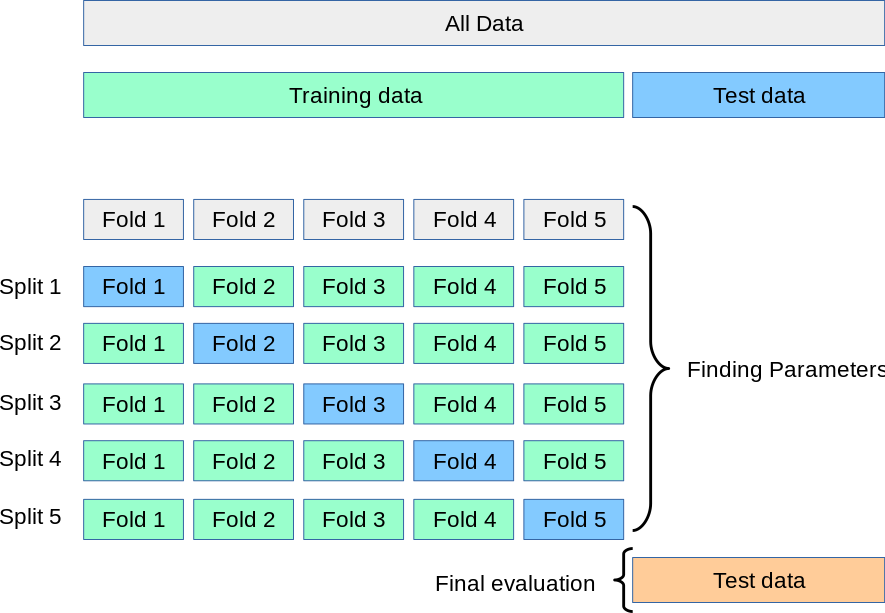

In [ ]:
'''
The code is performing cross-validation on linear regression and random forest regression models.
For each model, cross-val_score function from sklearn.model_selection module is used to evaluate 
the model's performance using neg_mean_squared_error as the scoring metric. The number of folds 
for cross-validation is set to 5 (cv=5).
The RMSE scores are then calculated by taking the square root of the negated scores.
Finally, the display_scores function is called to display the scores and its statistics such as mean and standard deviation.
'''
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=5)
lin_rmse_scores=np.sqrt(-lin_scores)
#print('RMSE Scores',lin_rmse_scores)

#Cross-validation for Forest Regressor
#keep cv as minimum as it will take a lot of time to get the results otherwise
forest_scores = cross_val_score(forest_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
#print(forest_rmse_scores)
print('=='*5,"Linear Reg Scores","=="*5)
print(display_scores(lin_scores))
print('=='*5,"Forest Reg Scores","=="*5)
print(display_scores(forest_scores))

lin_mean_mse = -lin_scores.mean()
lin_std_mse = lin_scores.std()
forest_mean_mse = -forest_scores.mean()
forest_std_mse = forest_scores.std()


========== Linear Reg Scores ==========
RMSE Scores: [0.31704958 0.29051165 0.28745435 0.28843465 0.28937957]
RMSE Mean: 0.2945659589876204
RMSE Std Dev: 0.011287313422442925
========== Forest Reg Scores ==========
RMSE Scores: [0.24297035 0.21188608 0.22943774]
RMSE Mean: 0.22809805564285804
RMSE Std Dev: 0.012725407238263238


In [ ]:
print([0.31704958**2, 0.29051165**2, 0.28745435**2, 0.28843465**2, 0.28937957**2])
print(0.2945659589876204**2,0.011287313422442925**2)
print([0.24297035**2, 0.21188608**2, 0.22943774**2])
print(0.22809805564285804**2,0.012725407238263238**2)

# **Cross-validation for DecisonTree**

In the case of decision tree algorithms, cross-validation can be particularly useful for mitigating overfitting, which is a common problem with decision trees. Overfitting occurs when a model becomes too complex and starts to capture the noise in the training data rather than the underlying patterns. This results in poor generalization performance on unseen data.

By using cross-validation, we can obtain a more reliable estimate of the performance of a decision tree algorithm on unseen data. The basic idea is to divide the available data into several folds, train the model on a portion of the data (the training set), and evaluate the performance on the remaining portion (the validation set). This process is repeated multiple times, using different portions of the data for training and validation, and the average performance across the folds is used as the final performance estimate.

By using cross-validation, we can avoid overfitting to the training data, get a better idea of how the algorithm will perform on new, unseen data, and identify the optimal number of decision trees to use in the ensemble.

---
See how the MSE now are more sensible. Earlier we got 0 MSE which is absurd. Always use cross-validation to check the robustness of the Fit.

In [ ]:
tree_scores = cross_val_score(tree_reg,new_data,new_data_labels,scoring="neg_mean_squared_error",cv=5)
tree_rmse_scores = np.sqrt(-tree_scores)
print(tree_rmse_scores)
print('=='*5,"Tree Reg Scores","=="*5)
display_scores(tree_scores)
tree_mean_mse = -tree_scores.mean()
tree_std_mse = tree_scores.std()

# **Simple ANN to do the regression**
---
An Artificial Neural Network (ANN) is a machine learning model that is inspired by the structure and function of the human brain. A simple ANN for regression can be implemented using the following steps:

Data preparation: The first step is to prepare the data for the model. This includes splitting the data into training and test sets, normalizing or scaling the input features, and converting the target variable into a suitable format.

Model definition: Next, the structure of the ANN is defined using a programming library such as TensorFlow or Keras. A simple ANN for regression typically has an input layer, one or more hidden layers, and an output layer. The input layer receives the input features, and the output layer produces the predicted target value. The hidden layers perform the non-linear transformations that enable the model to capture complex relationships between the features and target.

Model compilation: Once the model is defined, it is compiled by specifying the loss function, the optimizer, and any other relevant parameters. For a regression problem, the mean squared error (MSE) is commonly used as the loss function, and the optimizer updates the model weights during training to minimize the loss.

Model training: The model is then trained on the training data using a process called backpropagation. This involves repeatedly passing the input features through the model, comparing the predicted target value with the actual target value, and adjusting the model weights to reduce the difference between the two. The process is repeated until the loss function converges to a minimum value.

Model evaluation: Finally, the trained model is evaluated on the test data to determine its performance. A common evaluation metric for regression problems is the mean squared error (MSE), which measures the average difference between the predicted and actual target values.

This simple ANN for regression can be used to model complex relationships between the input features and target variable, and can be easily modified and expanded to handle more complex problems.

---

In [ ]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version",tf.__version__)
print("Keras version",keras.__version__)


# **Split the data into Testing and Training sets**
This code splits the data into two parts, training set and testing set.
The training set is used to train the model, while the testing set is used to evaluate its performance.
The train_test_split function from the sklearn library is used for this.
It takes the data and splits it into two parts with a ratio of 80:20, with the training set being 80% and the testing set being 20%.
The test_size argument is used to specify the size of the testing set.
The random_state argument is used to set a random seed, so that the results are reproducible.






In [ ]:
from sklearn.model_selection import train_test_split
train_set_full,test_set = train_test_split(data,test_size=0.2,random_state=42)
train_set,val_set = train_test_split(train_set_full,test_size=0.2,random_state=42)

In [ ]:
train_set_labels = train_set['Z_VI']
test_set_labels = test_set['Z_VI']
val_set_labels = val_set['Z_VI']

train_set_inp = train_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
test_set_inp = test_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
val_set_inp = val_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]

#train_set_inp = train_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
#test_set_inp = test_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]
#val_set_inp = val_set[['U_MAG','G_MAG','R_MAG','I_MAG','Z_MAG','U_EXT','G_EXT','R_EXT','I_EXT','Z_EXT','U-G_COLOR','G-R_COLOR','R-I_COLOR','I-Z_COLOR']]

In [ ]:
print(train_set_inp.shape,val_set_inp.shape)

# **Wider Network**
Less number of hidden layers, but increase the number of neurons

In [ ]:
# Creating a sequential model using the Keras API from Tensorflow library
#The first layer with 14 neurons and relu activation function
# The output layer with 1 neuron
wmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(1)
    ])

#Compiling the model using the Adam optimizer and mean squared error loss function
wmodel.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error',metrics=["accuracy"])
# Training the model with the train data and setting number of epochs to 100
whistory = wmodel.fit(train_set_inp, train_set_labels, epochs=50, validation_data=(val_set_inp,val_set_labels), verbose=True)

# Evaluate the model on test data
test_loss = wmodel.evaluate(test_set_inp, test_set_labels, verbose=True)
print(f'Test loss: {test_loss}')

In [ ]:
!pip3 install ann_visualizer
!pip3 install graphviz

In [ ]:

from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(wmodel,view=True,title='wideANN',filename='wideANN')

# **Model Summary**
The model.summary() function will provide a summary of the Neural Network model, including the number of layers, number of parameters in each layer, total number of parameters, and the shape of the input and output layers. The summary will give us an overall idea of the architecture of the model and help us to understand the model better.

In [ ]:
wmodel.summary()


In [ ]:
tf.keras.utils.plot_model(
    wmodel,
    to_file="wmodel.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
pd.DataFrame(whistory.history).plot(figsize=(12,5))
plt.grid()
whistory.history.keys()


# **Deeper network**
less number of neurons, but high number of layers

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
dmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

# Compile the model
dmodel.compile(optimizer=tf.keras.optimizers.Nadam(0.001),
              loss='mean_squared_error',metrics=["accuracy"])
# Train the model
dhistory = dmodel.fit(train_set_inp, train_set_labels, epochs=50, validation_data=(val_set_inp,val_set_labels),verbose=True)

# Evaluate the model on test data
test_loss = dmodel.evaluate(test_set_inp, test_set_labels, verbose=True)
print(f'Test loss: {test_loss}')

In [ ]:
pd.DataFrame(dhistory.history).plot(figsize=(12,5))
plt.grid()
dhistory.history.keys()

In [ ]:
dmodel.summary()
tf.keras.utils.plot_model(
    dmodel,
    to_file="dmodel.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)
ann_viz(dmodel,view=True,title='deepANN',filename='deepANN')

In [ ]:
#This code is creating a line plot to compare the loss of two different neural network models,
#one with a wider network and one with a deeper network, as a function of the number of epochs.
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(np.arange(50),whistory.history['loss'],label='Wider Network')
ax.plot(np.arange(50),dhistory.history['loss'],label='Deeper Network')
ax.set(xlabel='n_epochs',ylabel='Loss',title='Wider vs Deeper')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()


In [ ]:
!pip install scikeras
#Scikit-Learn compatible wrappers for Keras Models. Why SciKeras. SciKeras is derived from and API compatible with tf.keras.wrappers.scikit_learn 

# **Implement Cross-validation for better generalization**
This code is a demonstration of how to build and evaluate a simple neural network using the scikit-learn library. The code performs the following steps:

1. Imports necessary modules: The first few lines import modules from Tensorflow 
and scikit-learn. The Sequential class from Tensorflow is used to define the neural network architecture, while the Dense class is used to add dense (fully connected) layers to the network. The KerasRegressor class from the scikeras library is used to wrap the Tensorflow model in a scikit-learn compatible estimator. The cross_val_score function from scikit-learn's model selection module is used to evaluate the model's performance using cross-validation.

2. Define the neural network architecture: The baseline_model function defines the architecture of the neural network. A sequential model is created, and two dense layers are added to it, with the first layer having 64 neurons and the second layer having 1 neuron. The activation function used in the first layer is relu, while the second layer has no activation function (the output of the model is a scalar value). The model is then compiled using mean squared error as the loss function and the adam optimizer.

3. Evaluate the model: The KerasRegressor class is instantiated and passed the baseline model function as a parameter, along with other training parameters such as the number of epochs and batch size. The cross_val_score function is used to evaluate the model's performance on the input data and labels using 5-fold cross-validation, with negative mean squared error as the scoring metric. The final results are printed, showing the mean and standard deviation of the negative mean squared error.

This code provides a simple example of how to use Tensorflow and scikit-learn together to build and evaluate a neural network. The scikeras library allows you to use Tensorflow models within a scikit-learn framework, making it easier to perform tasks such as model selection, feature engineering, and evaluation.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(64, input_shape=(9,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(1, kernel_initializer='normal'))
 # Compile model
 model.compile(loss='mean_squared_error', optimizer='adam')
 return model
 
# evaluate model
estimator = KerasRegressor(model=baseline_model, epochs=50, batch_size=800, verbose=1)
#kfold = KFold(n_splits=10)
results = cross_val_score(estimator, train_set_inp, train_set_labels, cv=10, scoring='neg_mean_squared_error')
print("Baseline: %.4f (%.4f) MSE" % (-results.mean(), results.std()))
wd_mean_mse = -results.mean()
wd_std_mse = results.std()

# **Cross-validation for deeper network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

def kd_baseline_model():
 # create model
 kdmodel = Sequential()
 kdmodel.add(Dense(30, input_shape=(9,), kernel_initializer='normal', activation='relu'))
 kdmodel.add(Dense(20, kernel_initializer='normal'))
 kdmodel.add(Dense(15, kernel_initializer='normal'))
 kdmodel.add(Dense(7, kernel_initializer='normal'))
 kdmodel.add(Dense(3, kernel_initializer='normal'))
 kdmodel.add(Dense(1, kernel_initializer='normal'))
 # Compile model
 kdmodel.compile(loss='mean_squared_error', optimizer='adam')
 return kdmodel
 
# evaluate model
kdestimator = KerasRegressor(model=kd_baseline_model, epochs=50, batch_size=800, verbose=1)
#kfold = KFold(n_splits=10)
kdresults = cross_val_score(kdestimator, train_set_inp, train_set_labels, cv=10, scoring='neg_mean_squared_error')
print("Baseline: %.4f (%.4f) MSE" % (-kdresults.mean(), kdresults.std()))
kd_mean_mse = -kdresults.mean()
kd_std_mse = kdresults.std()

In [ ]:
np.median(kdresults)


In [ ]:
feature_importance=pd.DataFrame({
    'rfc':forest_reg.feature_importances_,
    'dt':tree_reg.feature_importances_
},index=new_data.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [ ]:
forest_reg.feature_importances_

In [ ]:
def plot_model_history(history):
    '''Plot the training and validation history for a TensorFlow network'''

    # Extract loss and accuracy
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    ax[0].plot(np.arange(n_epochs), loss, label='Training Loss')
    #ax[0].plot(np.arange(n_epochs), val_loss, label='Validation Loss')
    ax[0].set_title('Loss Curves')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')

    ax[1].plot(np.arange(n_epochs), acc, label='Training Accuracy')
    #ax[1].plot(np.arange(n_epochs), val_acc, label='Validation Accuracy')
    ax[1].set_title('Accuracy Curves')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')

### Note
Choosing the best model architecture for a neural network can be a challenging task, and there is no one-size-fits-all solution. However, here are some general guidelines that can help:

1. Start with a simple model: Start with a simple model architecture and gradually increase its complexity if necessary. This allows you to quickly gauge the potential of different architectures and avoid overcomplicating the model too quickly.

2. Consider the problem type: The architecture of the network should be chosen based on the type of problem you are trying to solve. For example, convolutional neural networks (CNNs) are well suited for image classification tasks, while recurrent neural networks (RNNs) are well suited for sequence data such as speech or text.

3. Experiment with different architectures: Try out different model architectures and compare their performance. This could involve trying different numbers of hidden layers, different activation functions, or different types of layer.

4. Monitor overfitting: Overfitting is a common issue when training neural networks. Choose an architecture that strikes a balance between complexity and capacity to prevent overfitting. You can monitor the overfitting by keeping track of the performance on a validation set during training.

5. Regularization: Regularization can help prevent overfitting. Consider using techniques such as dropout, weight decay, or early stopping to regularize the model.

6. Transfer learning: If you have a similar problem with a lot of labeled data, consider using transfer learning, where a pre-trained model is fine-tuned on your data.

7. Grid search or random search: To find the best hyperparameters for your model, consider using a grid search or random search. This can help you find the best combination of hyperparameters, such as the number of hidden units, learning rate, and batch size.

Ultimately, choosing the best model architecture for a neural network requires a combination of intuition, trial-and-error, and a deep understanding of the problem you are trying to solve.





# **XGBoost**
XGBoost (short for eXtreme Gradient Boosting) is a powerful open-source software library for gradient boosting algorithms that are widely used in machine learning for both classification and regression tasks
Gradient Boosting is an ensemble learning technique that combines multiple weak learning models to create a strong predictive model. 

The basic idea behind gradient boosting is to iteratively add new models to the ensemble, with each model trying to correct the errors of the previous models. In other words, each new model is trained on the residual errors of the previous models, and the final prediction is obtained by summing up the predictions of all the models.

This code implements a regression analysis using the XGBoost library. Here's what the code does:

1.Imports the XGBoost library as xgb.

2.Splits the data into training and testing sets, where X_train and X_test are the input features for the training and testing sets respectively, and y_train and y_test are the corresponding labels for the training and testing sets.

3.Defines the XGBoost model parameters in the "params" dictionary. The "objective" parameter specifies the learning task and loss function, "max_depth" specifies the maximum depth of each tree, "eta" specifies the learning rate, "subsample" specifies the fraction of observations to subsample at each step, "colsample_bytree" specifies the fraction of columns to use at each split, and "n_jobs" specifies the number of CPU cores to use (-1 means use all available cores).

4.Trains the XGBoost model using the training set. The "xgb.DMatrix" function is used to create a DMatrix object from the input features and labels of the training set, and this DMatrix object is used to train the model using the "xgb.train" function and the parameters defined in the "params" dictionary. The trained model is stored in the "xg_model" variable.

5.Makes predictions on the test set using the trained model. Another DMatrix object is created from the input features of the test set, and the "predict" method is used to obtain the predicted labels for the test set. The predicted labels are stored in the "xg_y_pred" variable.

6.Evaluates the performance of the model on the test set. The "mean_squared_error" function from scikit-learn is used to calculate the mean squared error between the predicted and actual labels of the test set, and the result is stored in the "xg_mse" variable. Finally, the mean squared error is printed to the console using the "print" function.


In [ ]:

import xgboost as xgb


# Split data into training and testing sets
X_train = train_set_inp
X_test = test_set_inp
y_train = train_set_labels
y_test = test_set_labels

# Define XGBoost model parameters
params = {
    'objective': 'reg:squarederror', # specify the learning task and loss function
    'max_depth': 7,                  # maximum depth of each tree
    'eta': 0.5,                      # learning rate
    'subsample': 0.7,                # fraction of observations to subsample at each step
    'colsample_bytree': 0.7,         # fraction of columns to use at each split
    'n_jobs': -1                     # use all available CPU cores
}

# Train XGBoost model
xg_dtrain = xgb.DMatrix(X_train, label=y_train)
xg_model = xgb.train(params, xg_dtrain)

# Make predictions on test set
xg_dtest = xgb.DMatrix(X_test)
xg_y_pred = xg_model.predict(xg_dtest)

# Evaluate model performance
xg_mse = mean_squared_error(y_test, xg_y_pred)
print('MSE:', xg_mse)

In [ ]:

from sklearn.model_selection import KFold


# Define cross-validation parameters
kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgscores = []

# Perform cross-validation
for train_index, test_index in kf.split(train_set_inp):
    X_train, X_test = train_set_inp.iloc[train_index], train_set_inp.iloc[test_index]
    y_train, y_test = train_set_labels.iloc[train_index], train_set_labels.iloc[test_index]
    
    # Train XGBoost model
    dtrain = xgb.DMatrix(X_train, label=y_train)
    model = xgb.train(params, dtrain)

    # Make predictions on test set
    dtest = xgb.DMatrix(X_test)
    y_pred = model.predict(dtest)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    xgscores.append(mse)

# Print average MSE across all folds
print('Mean MSE:', np.mean(xgscores))
print('Mean MSE:', np.std(xgscores))
xg_mean_mse = np.mean(xgscores)
xg_std_mse = np.std(xgscores)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

archs = ['Linear Reg','Decision Tree','Random Forest','Wider ANN', 'Deeper ANN','XGBOOST']
mean_mse = [0.0870,0.103,0.05266,0.0881,0.146,0.05519]
std_mse = [0.006,0.014,0.0058,0.00396,0.0796,0.002]
mean_mse = [lin_mean_mse,tree_mean_mse,forest_mean_mse,wd_mean_mse,kd_mean_mse,xg_mean_mse]
std_mse = [lin_std_mse,tree_std_mse,forest_std_mse,wd_std_mse,kd_std_mse,xg_std_mse]

fig, ax = plt.subplots(figsize=(10,6))


ax.errorbar(np.arange(len(mean_mse))+1, mean_mse,
            yerr=std_mse,
            fmt='o')
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'

#ax.set_xticklabels(archs,)
#ax.set_xticks(np.arange(len(mean_mse))+1, archs, rotation='vertical')
ax.set_xticks(np.arange(len(mean_mse))+1)
ax.set_xticklabels(archs, minor=False, rotation=45)
ax.set_xlabel('ML model')
ax.set_ylabel('MSE')
ax.set_title('MSE comparison for different ML models')


plt.show()

NameError: name 'lin_mean_mse' is not defined